In [19]:
n_rounds = 10
n_simulations = 10000
initial_capital = 1

flips = np.random.rand(n_simulations, n_rounds) >= 0.5
print(flips)
multipliers = np.where(flips, 1.35, 0.7)
print(multipliers)

[[False False False ... False  True  True]
 [False False  True ...  True  True False]
 [ True False  True ... False  True  True]
 ...
 [False  True  True ... False  True False]
 [False False  True ...  True False False]
 [ True  True  True ... False False False]]
[[0.7  0.7  0.7  ... 0.7  1.35 1.35]
 [0.7  0.7  1.35 ... 1.35 1.35 0.7 ]
 [1.35 0.7  1.35 ... 0.7  1.35 1.35]
 ...
 [0.7  1.35 1.35 ... 0.7  1.35 0.7 ]
 [0.7  0.7  1.35 ... 1.35 0.7  0.7 ]
 [1.35 1.35 1.35 ... 0.7  0.7  0.7 ]]


In [20]:
final_capitals = initial_capital * np.prod(multipliers, axis=1)
final_capitals

array([0.7536315 , 0.7536315 , 1.45343218, ..., 1.45343218, 0.7536315 ,
       1.45343218])

In [25]:
print('Median: ', np.median(final_capitals))
print('Expected mean:',np.mean(final_capitals))

Median:  0.753631499840625
Expected mean: 1.2703870103618


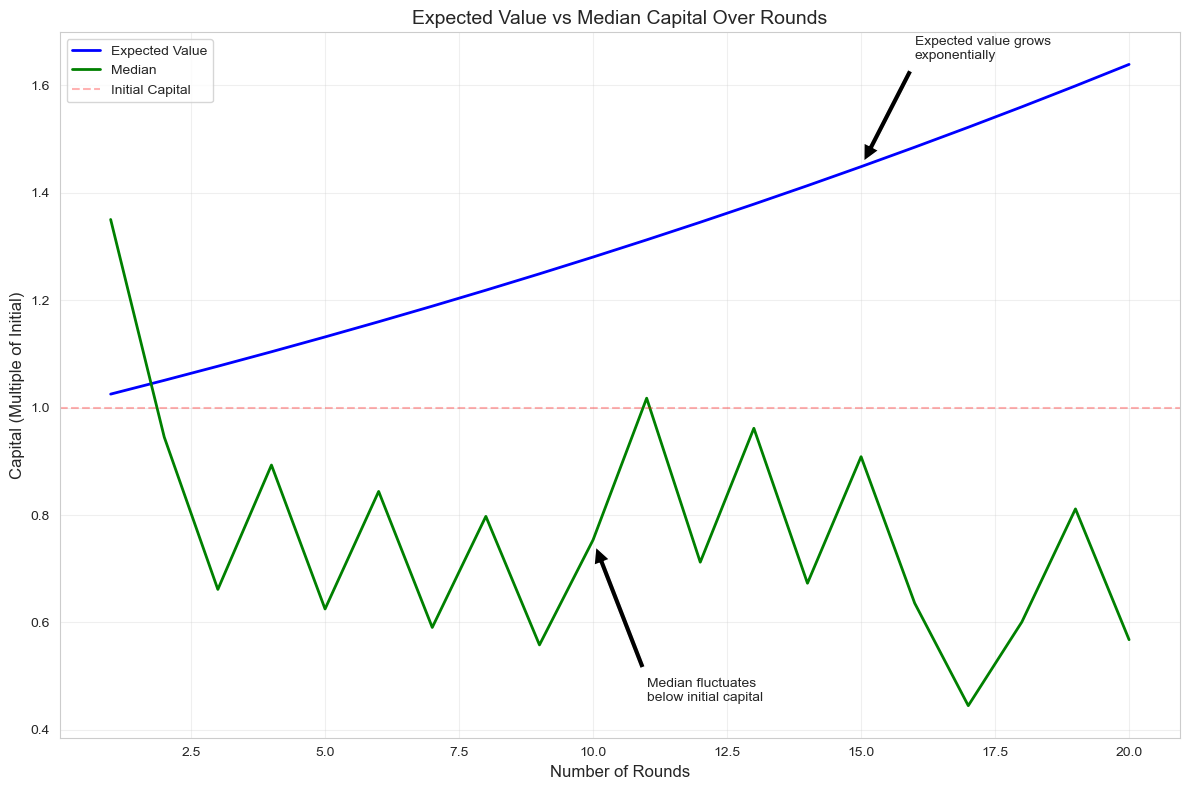


Statistics after 20 rounds:
Expected Value: 1.6386
Median: 0.5680
Ratio (E[C_20]/Median): 2.8851

Probability of losing money after 10 rounds: 62.80%


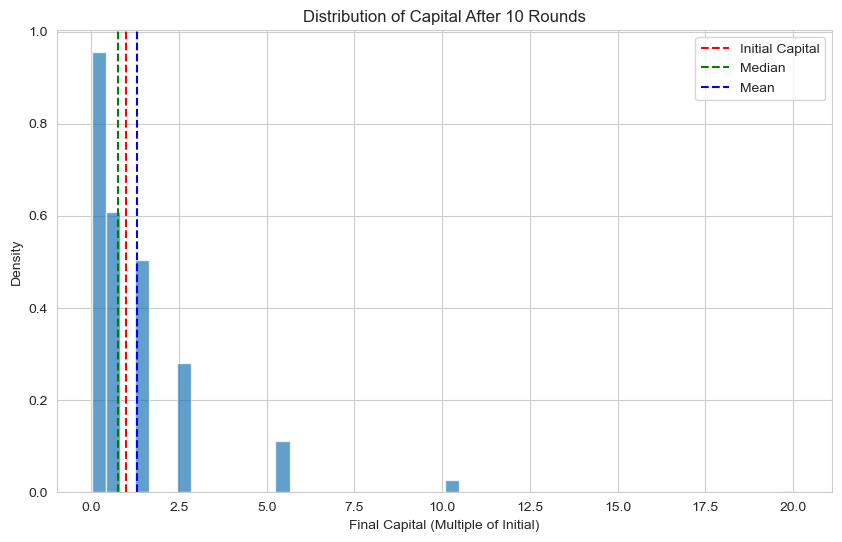

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def simulate_gambling(initial_capital=1, max_rounds=20, n_simulations=100000):
    # Create arrays for storing results
    rounds = np.arange(1, max_rounds + 1)
    expected_values = np.zeros(max_rounds)
    medians = np.zeros(max_rounds)
    
    # Calculate expected values for each round
    expected_values = initial_capital * np.power(1.025, rounds)
    
    # Simulate for each number of rounds
    for n in rounds:
        # Generate random flips for all simulations at once
        flips = np.random.rand(n_simulations, n) >= 0.5
        multipliers = np.where(flips, 1.35, 0.7)
        
        # Calculate final capitals for this round number
        final_capitals = initial_capital * np.prod(multipliers, axis=1)
        medians[n-1] = np.median(final_capitals)
    
    return rounds, expected_values, medians

# Set random seed for reproducibility
np.random.seed(42)

# Run simulation
rounds, expected_values, medians = simulate_gambling()

# Create visualization
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")

# Plot expected value and median
plt.plot(rounds, expected_values, 'b-', label='Expected Value', linewidth=2)
plt.plot(rounds, medians, 'g-', label='Median', linewidth=2)

# Add reference line at initial capital (1)
plt.axhline(y=1, color='r', linestyle='--', alpha=0.3, label='Initial Capital')

# Customize plot
plt.title('Expected Value vs Median Capital Over Rounds', fontsize=14)
plt.xlabel('Number of Rounds', fontsize=12)
plt.ylabel('Capital (Multiple of Initial)', fontsize=12)
plt.legend(fontsize=10)

# Add grid
plt.grid(True, alpha=0.3)

# Adjust layout
plt.tight_layout()

# Add annotations for key insights
plt.annotate('Expected value grows\nexponentially', 
            xy=(15, expected_values[14]), 
            xytext=(16, expected_values[14]+0.2),
            arrowprops=dict(facecolor='black', shrink=0.05),
            fontsize=10)

plt.annotate('Median fluctuates\nbelow initial capital', 
            xy=(10, medians[9]), 
            xytext=(11, medians[9]-0.3),
            arrowprops=dict(facecolor='black', shrink=0.05),
            fontsize=10)

# Show plot
plt.show()

# Print some statistics
print("\nStatistics after 20 rounds:")
print(f"Expected Value: {expected_values[-1]:.4f}")
print(f"Median: {medians[-1]:.4f}")
print(f"Ratio (E[C_20]/Median): {expected_values[-1]/medians[-1]:.4f}")

# Additional analysis for the distribution at round 10
n_rounds = 10
flips = np.random.rand(n_simulations, n_rounds) >= 0.5
multipliers = np.where(flips, 1.35, 0.7)
final_capitals_10 = np.prod(multipliers, axis=1)

# Calculate probability of losing money
prob_loss = np.mean(final_capitals_10 < 1)
print(f"\nProbability of losing money after {n_rounds} rounds: {prob_loss:.2%}")

# Create histogram of outcomes at round 10
plt.figure(figsize=(10, 6))
plt.hist(final_capitals_10, bins=50, density=True, alpha=0.7)
plt.title(f'Distribution of Capital After {n_rounds} Rounds')
plt.xlabel('Final Capital (Multiple of Initial)')
plt.ylabel('Density')
plt.axvline(x=1, color='r', linestyle='--', label='Initial Capital')
plt.axvline(x=np.median(final_capitals_10), color='g', linestyle='--', label='Median')
plt.axvline(x=np.mean(final_capitals_10), color='b', linestyle='--', label='Mean')
plt.legend()
plt.show()

In [27]:
def leveraged_etf_example():
    initial = 100
    leverage = 3
    
    # Day 1: Up 10%
    day1 = initial * (1 + leverage * 0.1)  # Up 30%
    # Day 2: Down 10%
    day2 = day1 * (1 + leverage * -0.1)    # Down 30%
    
    return day2 - initial

# The loss would be larger than you might expect due to volatility drag